In [ ]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
dataset='/content/drive/MyDrive/ML/framingham.csv'
import pandas as pd
df=pd.read_csv(dataset)

In [ ]:
df

gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
0          1   39        4.0              0         0.0     0.0   
1          0   46        2.0              0         0.0     0.0   
2          1   48        1.0              1        20.0     0.0   
3          0   61        3.0              1        30.0     0.0   
4          0   46        3.0              1        23.0     0.0   
...      ...  ...        ...            ...         ...     ...   
4233       1   50        1.0              1         1.0     0.0   
4234       1   51        3.0              1        43.0     0.0   
4235       0   48        2.0              1        20.0     NaN   
4236       0   44        1.0              1        15.0     0.0   
4237       0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  

[4238 rows x 16 columns]

In [ ]:
#print the number of NAs in each column of dataframe
print(df.isna().sum())

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
df['education'] = df['education'].fillna(df['education'].mean())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mean())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

In [ ]:
print(df.isna().sum())

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


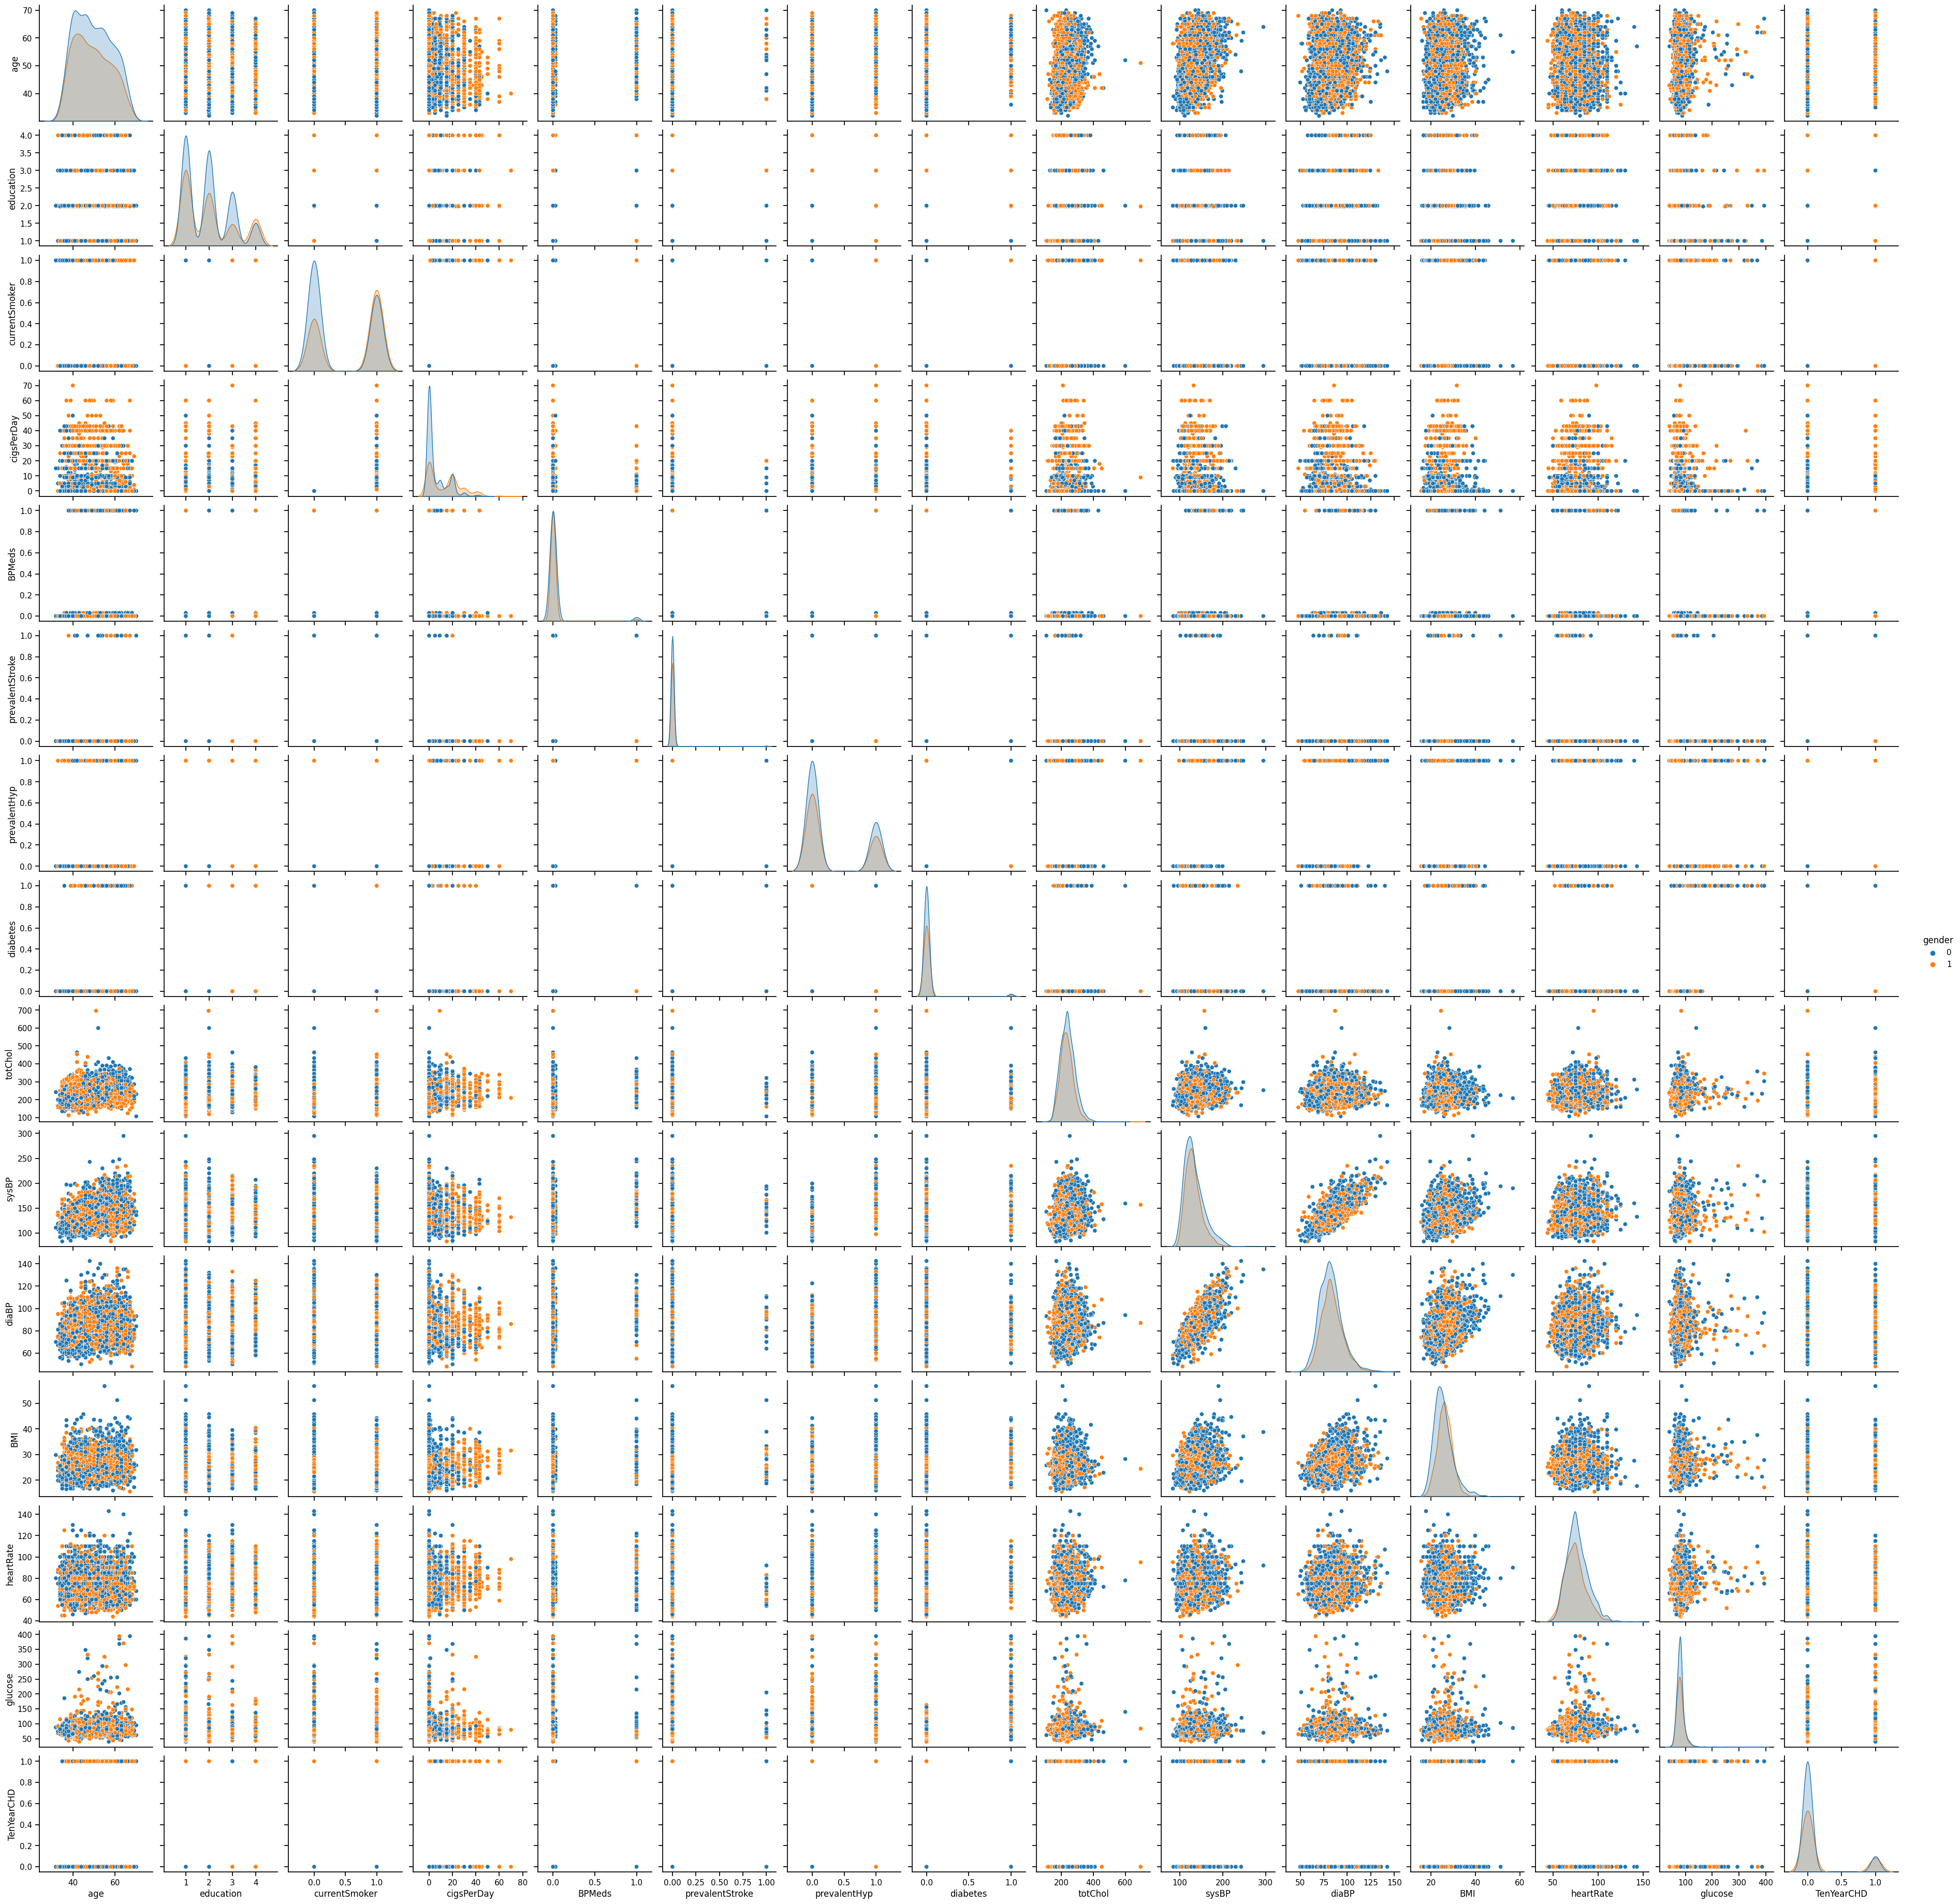

In [ ]:
#Understanding the distribution
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['gender','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']],hue='gender')

<Axes: xlabel='TenYearCHD', ylabel='count'>

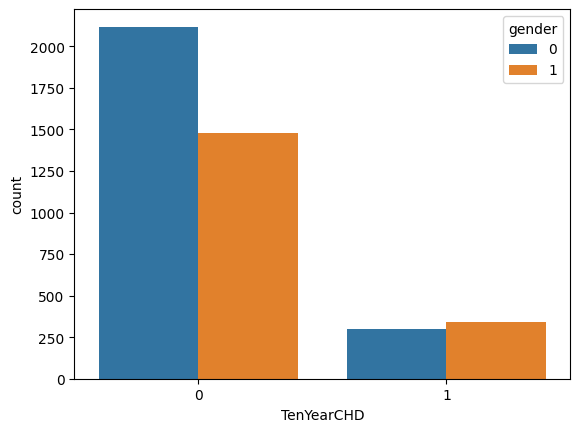

In [ ]:
import seaborn as sns
sns.countplot(x='TenYearCHD',hue='gender',data=df)

In [ ]:
age_category=[]
for i in range(0,len(df['age'])):
  if df['age'][i]<=30:
    age_category.append('30 and below');
  elif 30< df['age'][i]<=40:
    age_category.append('31-40');
  elif 40<df['age'][i]<=50:
    age_category.append('41-50');
  elif 50<df['age'][i]<=60:
    age_category.append('51-60');
  elif 60<df['age'][i]<=70:
    age_category.append('61-70');
  else:
    age_category.append('70 and above');

age_data_frame=pd.DataFrame(data=age_category,columns=['age_category'])
df_sample=pd.concat([df,age_data_frame],axis=1)
df_sample.head

<Axes: xlabel='TenYearCHD', ylabel='count'>

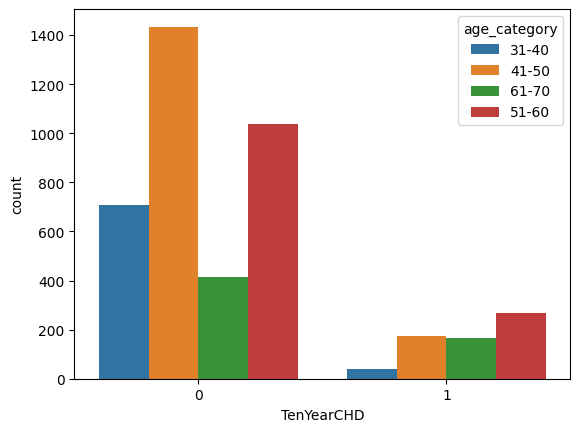

In [ ]:
sns.countplot(x='TenYearCHD',hue='age_category',data=df_sample)

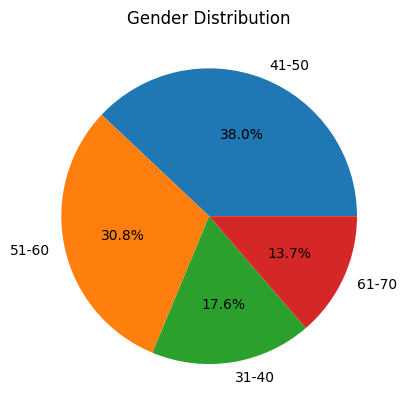

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a column named 'gender'
gender_counts = df_sample['age_category'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Set the plot title
plt.title("Age Category Distribution")

# Display the pie chart
plt.show()

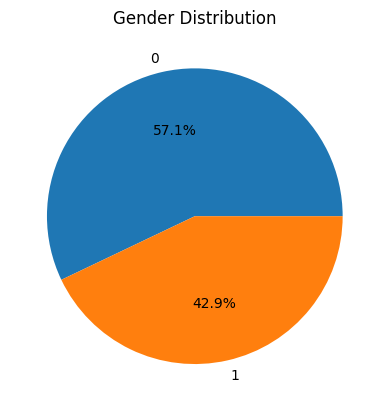

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a column named 'gender'
gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Set the plot title
plt.title("Gender Distribution")

# Display the pie chart
plt.show()



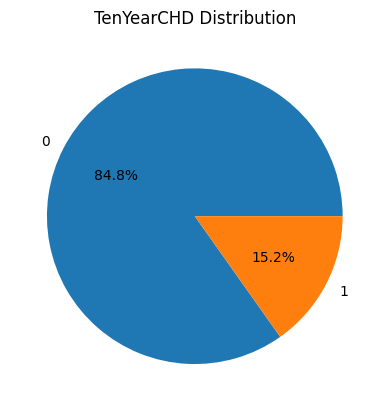

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a column named 'gender'
gender_counts = df['TenYearCHD'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Set the plot title
plt.title("TenYearCHD Distribution")

# Display the pie chart
plt.show()

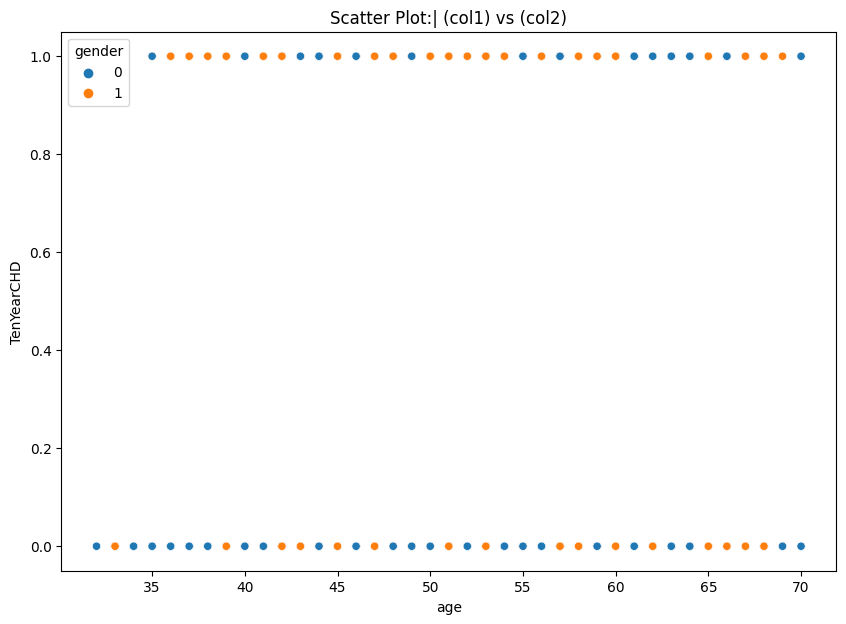

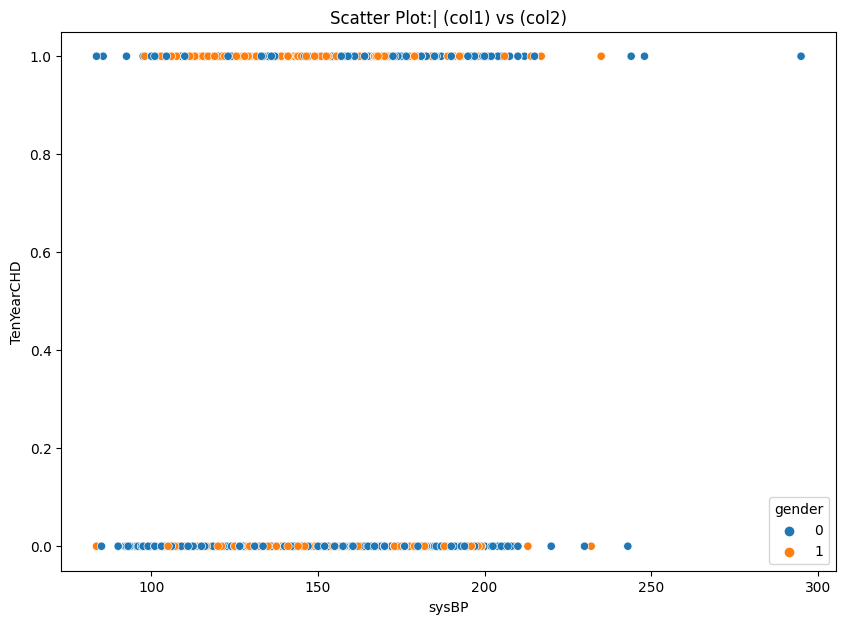

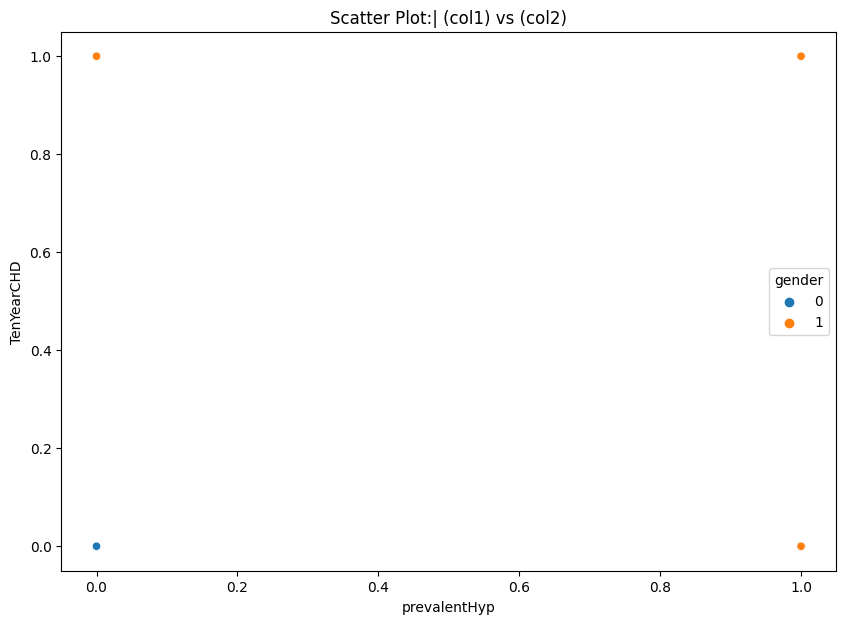

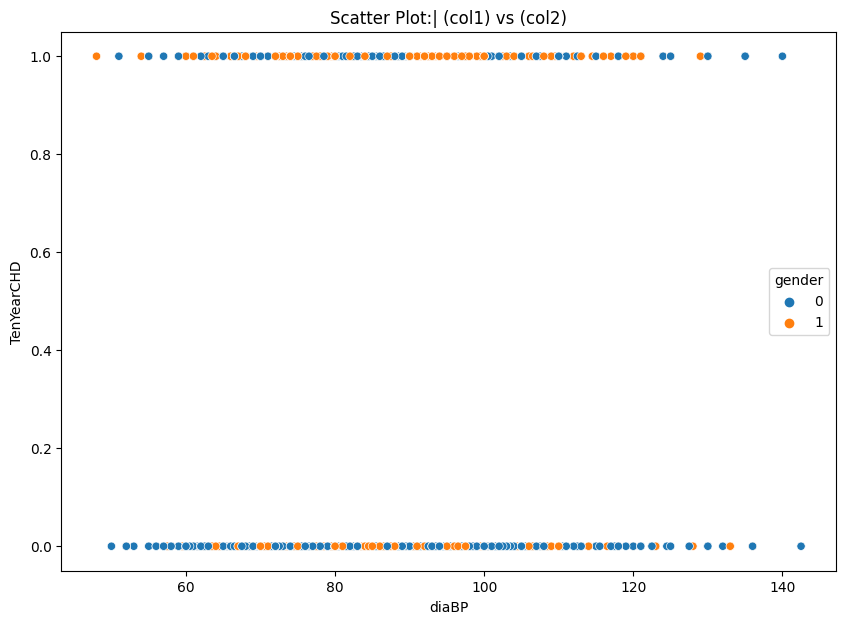

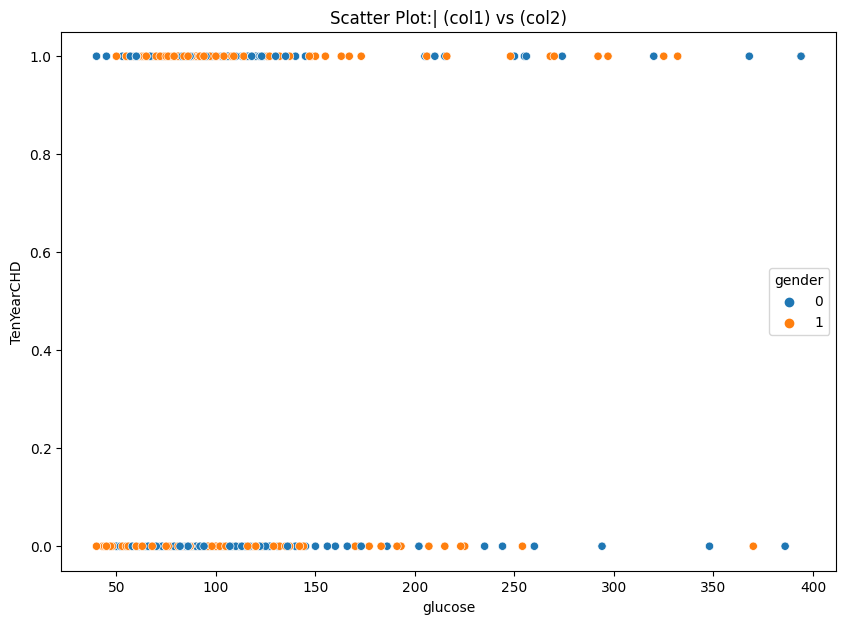

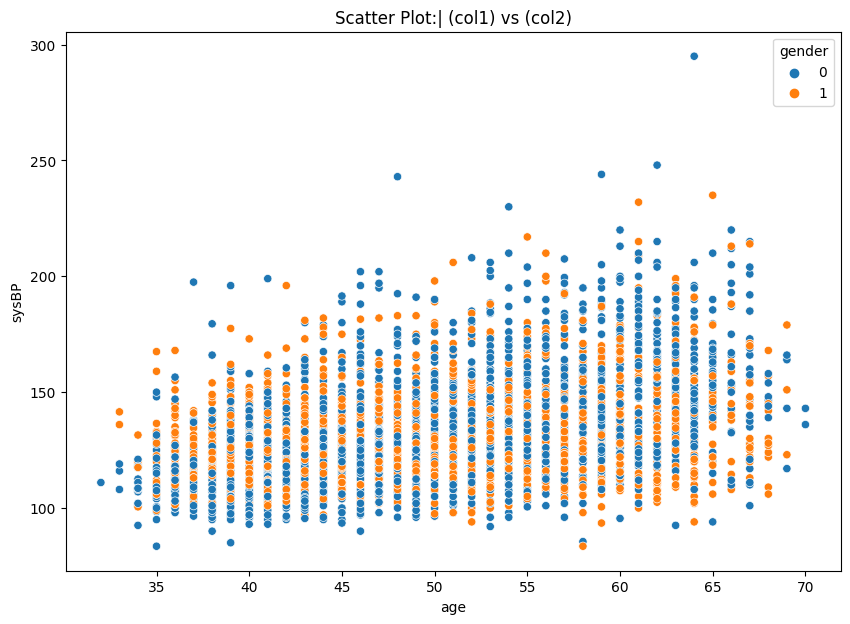

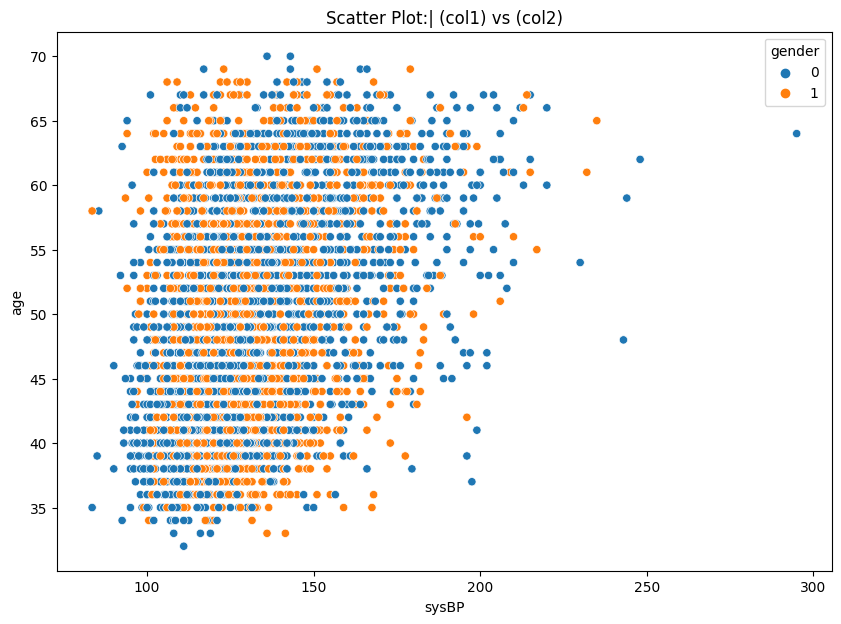

In [ ]:
import matplotlib.pyplot as plt
def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title("Scatter Plot:| (col1) vs (col2)")
plot_vs(df,'age','TenYearCHD','gender')
plot_vs(df,'sysBP','TenYearCHD','gender')
plot_vs(df,'prevalentHyp','TenYearCHD','gender')
plot_vs(df,'diaBP','TenYearCHD','gender')
plot_vs(df,'glucose','TenYearCHD','gender')
plot_vs(df,'age','sysBP','gender')
plot_vs(df,'sysBP','age','gender')

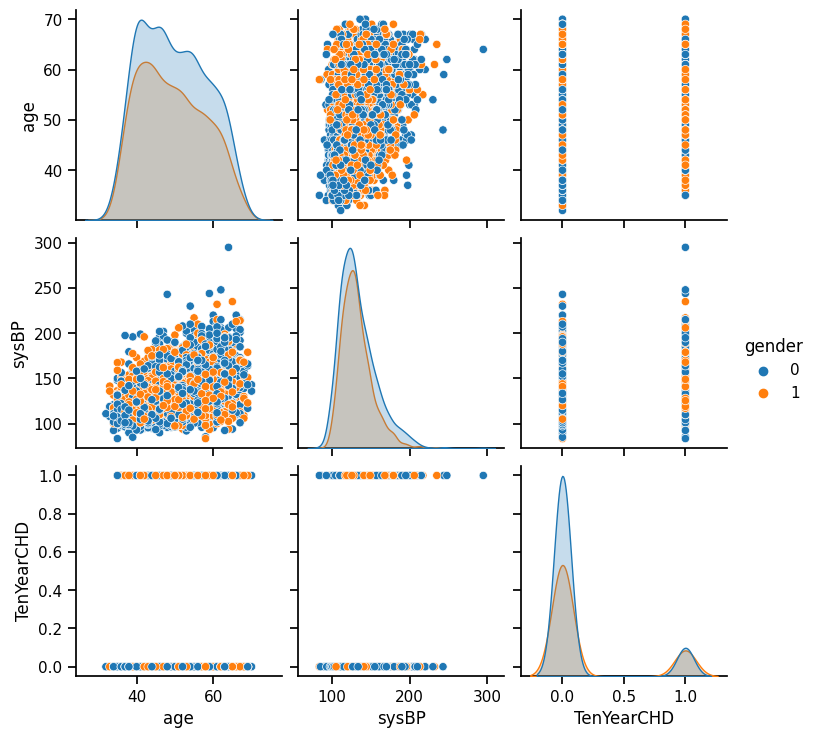

In [ ]:
#Understanding the distribution
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['gender','age','sysBP','TenYearCHD']],hue='gender')

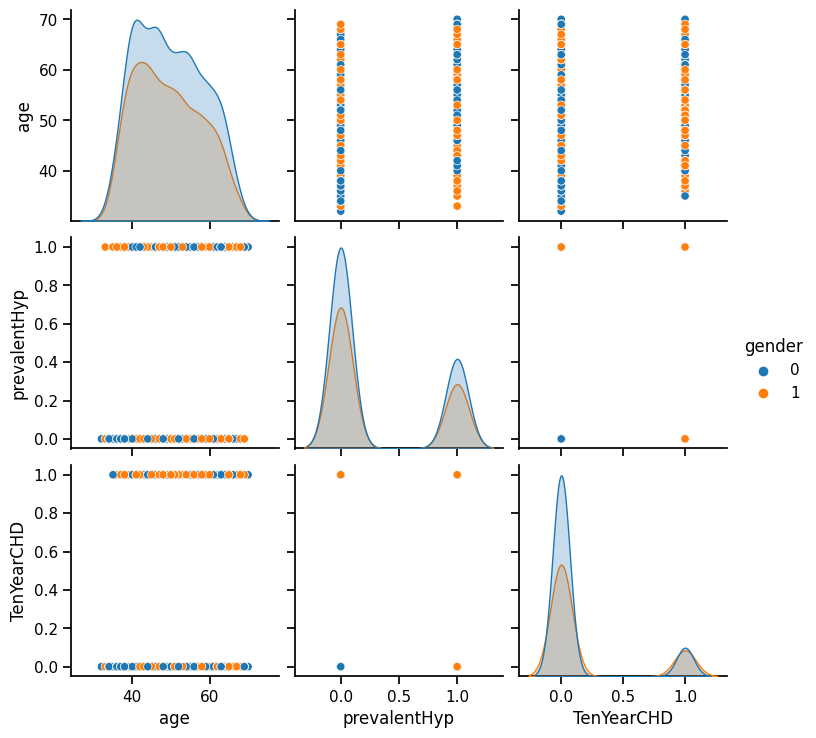

In [ ]:
#'prevalentHyp','diabetes','glucose'
#Understanding the distribution
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['gender','age','prevalentHyp','TenYearCHD']],hue='gender')

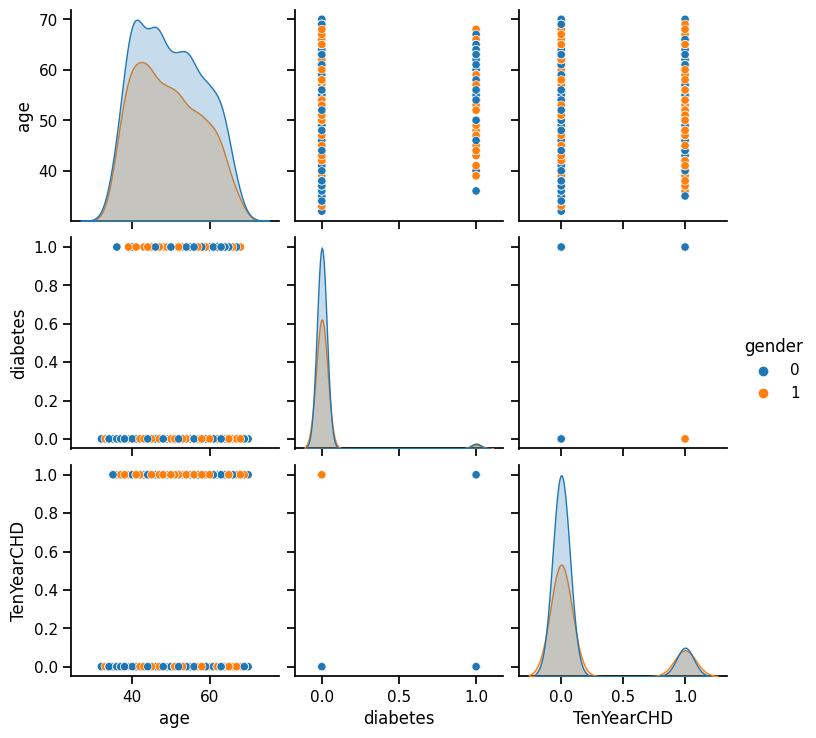

In [ ]:
#Understanding the distribution
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['gender','age','diabetes','TenYearCHD']],hue='gender')

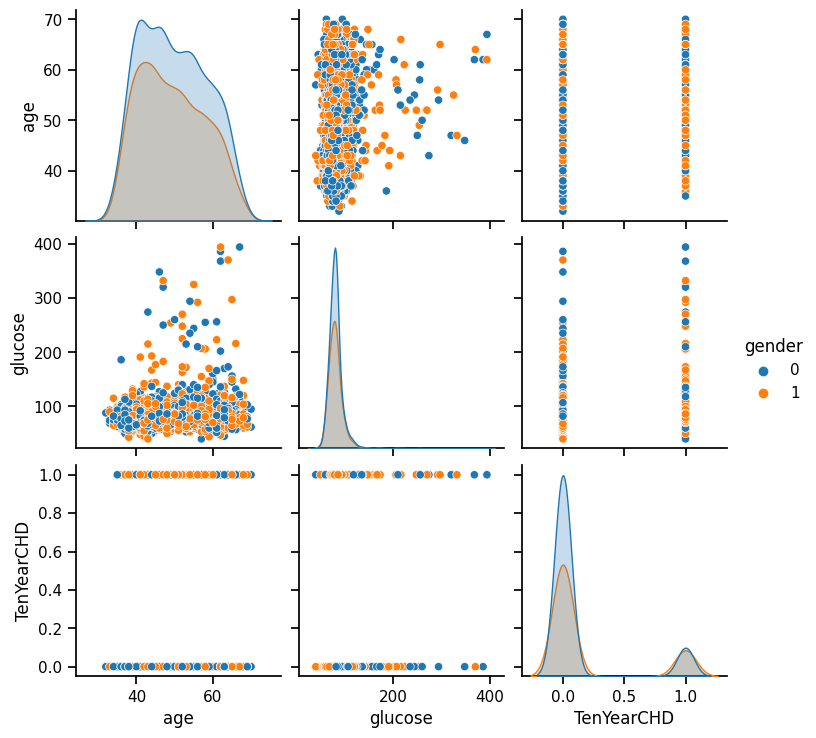

In [ ]:
#Understanding the distribution
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['gender','age','glucose','TenYearCHD']],hue='gender')

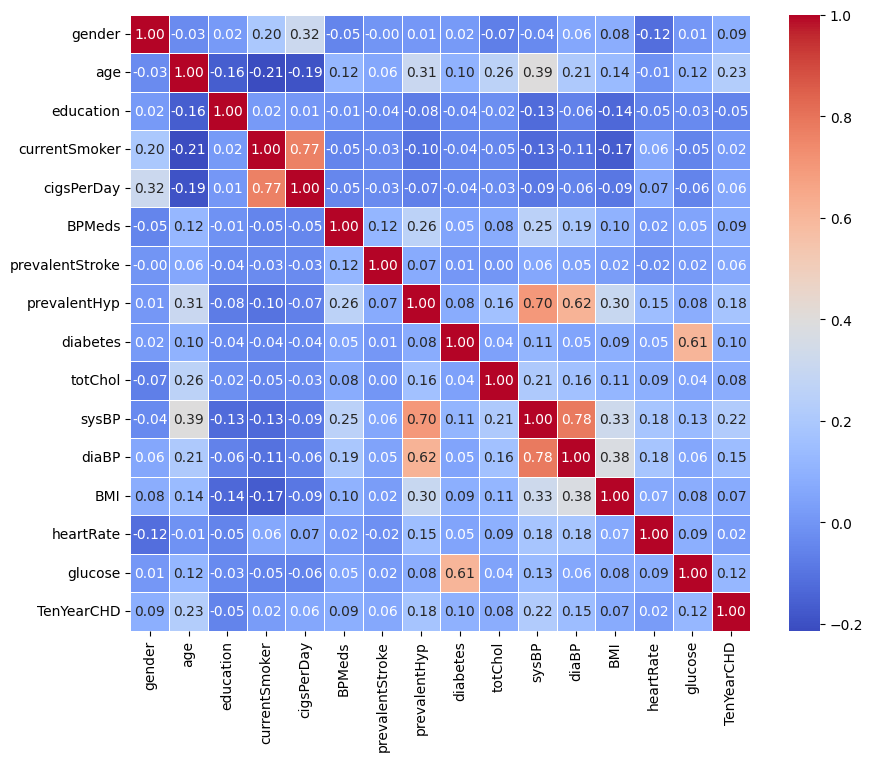

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns=['gender','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']
data=df[columns]
corelation_matrix= data.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.yticks(rotation=0)
plt.show()

In [ ]:
TenYearCHD_corelations = corelation_matrix["TenYearCHD"]

In [ ]:
TenYearCHDs_sorted = TenYearCHD_corelations.sort_values(ascending=False)

In [ ]:
print(TenYearCHDs_sorted)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.120406
diabetes           0.097317
gender             0.088428
BPMeds             0.086774
totChol            0.081624
BMI                0.074680
prevalentStroke    0.061810
cigsPerDay         0.057775
heartRate          0.022898
currentSmoker      0.019456
education         -0.053384
Name: TenYearCHD, dtype: float64


In [ ]:
Y = df['TenYearCHD']
X = df.drop(columns='TenYearCHD')

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2 , random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [ ]:
print(X_train_scaled.shape,X_test_scaled.shape, Y_train.shape,Y_test.shape)

(3390, 15) (848, 15) (3390,) (848,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()

lrmodel.fit(X_train_scaled,Y_train)

LogisticRegression()

In [ ]:
lrmodel.score(X_train_scaled,Y_train)

0.8592920353982301

In [ ]:
lrmodel.score(X_test_scaled,Y_test)

0.8455188679245284

In [ ]:
X=sc.transform(X)

In [ ]:
lrmodel.score(X,Y)

0.856536101934875

In [ ]:
coefficients=lrmodel.coef_
print(coefficients)

[[ 0.21635451  0.52284324 -0.00373038  0.01763908  0.27002551  0.01692892
   0.08452846  0.16742972  0.054612    0.0912552   0.29073846 -0.09032936
   0.03575889 -0.01982821  0.12616453]]


In [ ]:
intercept=lrmodel.intercept_
print(intercept)

[-1.99450414]


In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = lrmodel.predict(X_test_scaled)

In [ ]:
Y_pred

In [ ]:
acc=accuracy_score(Y_pred,Y_test)
print(acc)

0.8455188679245284
